In [1]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
nlp = spacy.load("en_core_web_sm")

In [2]:
#hide warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Create a list to append tweet data
tweets_list = []
maxTweets = 5000

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('crypto since:2022-01-01 until:{today}').get_items()):
    if i>maxTweets:
        break
    tweets_list.append([tweet.content])
    
# Creating a dataframe from the tweets list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])

In [4]:
tweets_to_df.head()

,Tweets
0,The opening scene of Clerks III absolutely shi...
1,@aeyakovenko Never heard of it until today. Gi...
2,SAITAMA token is one of the biggest scams perf...
3,@CaptTK13 @ThePhunky1 @Buddies_St @TheKiltMast...
4,If we look at the behavior and revaluation of ...


In [5]:
def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#','',text) #removes hastag '#' symbol
    text = re.sub('RT[\s]+','',text)
    text = re.sub('https?:\/\/\S+', '', text) 
    text = re.sub('\n',' ',text)
    return text

In [6]:
tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets)

In [7]:
tweets_to_df.head()

,Tweets,cleanedTweets
0,The opening scene of Clerks III absolutely shi...,The opening scene of Clerks III absolutely shi...
1,@aeyakovenko Never heard of it until today. Gi...,Never heard of it until today. GitHub says mo...
2,SAITAMA token is one of the biggest scams perf...,SAITAMA token is one of the biggest scams perf...
3,@CaptTK13 @ThePhunky1 @Buddies_St @TheKiltMast...,We have a similar list. But still...
4,If we look at the behavior and revaluation of ...,If we look at the behavior and revaluation of ...


In [8]:
tweets_to_df.to_csv('tweets_crypto.csv') #write dataframe into csv file

In [9]:
savedTweets = pd.read_csv('tweets_crypto.csv',index_col=0) #reads csv file

In [10]:
savedTweets.shape

(485, 2)

In [11]:
#get subjectivity and polarity of tweets with a function

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

In [12]:
savedTweets.drop('Tweets', axis=1).head() #shows polarity and subjectivity of each tweet and drops the uncleaned tweets column

,cleanedTweets,Subjectivity,Polarity
0,The opening scene of Clerks III absolutely shi...,0.668000,0.112000
1,Never heard of it until today. GitHub says mo...,0.333333,0.166667
2,SAITAMA token is one of the biggest scams perf...,0.750000,0.450000
3,We have a similar list. But still...,0.400000,0.000000
4,If we look at the behavior and revaluation of ...,0.406250,0.043750


In [13]:
#create a function to check negative, neutral and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score ==0:
        return 'Neutral'
    else:
        return 'Positive'
    
savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

In [14]:
savedTweets.drop('Tweets', axis=1).head()

,cleanedTweets,Subjectivity,Polarity,Analysis
0,The opening scene of Clerks III absolutely shi...,0.668000,0.112000,Positive
1,Never heard of it until today. GitHub says mo...,0.333333,0.166667,Positive
2,SAITAMA token is one of the biggest scams perf...,0.750000,0.450000,Positive
3,We have a similar list. But still...,0.400000,0.000000,Neutral
4,If we look at the behavior and revaluation of ...,0.406250,0.043750,Positive


In [15]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

Positive    287
Neutral     101
Negative     97
Name: Analysis, dtype: int64

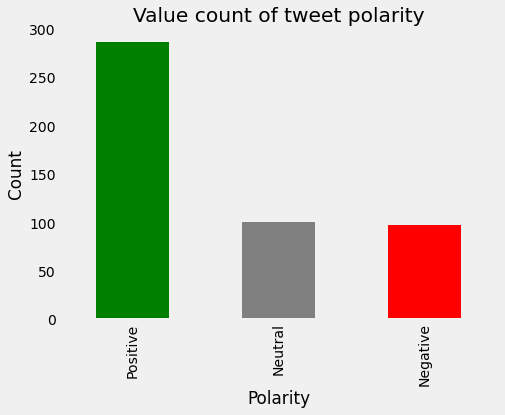

In [16]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
#xlabel = ['Positive','Negative','Neutral']
#plt.bar(xlabel,savedTweets['Analysis'].value_counts(), color = color)
color = ['green','grey','red']
savedTweets['Analysis'].value_counts().plot(kind='bar',color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of polarity')

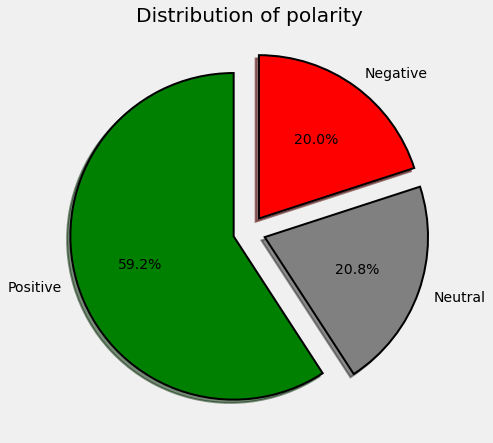

In [17]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize=(7,7))
colors = ('green', 'grey', 'red')
wp={'linewidth':2, 'edgecolor': 'black'}
tags=savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors=colors, 
         startangle=90, wedgeprops=wp, explode=explode, label='')
plt.title('Distribution of polarity')

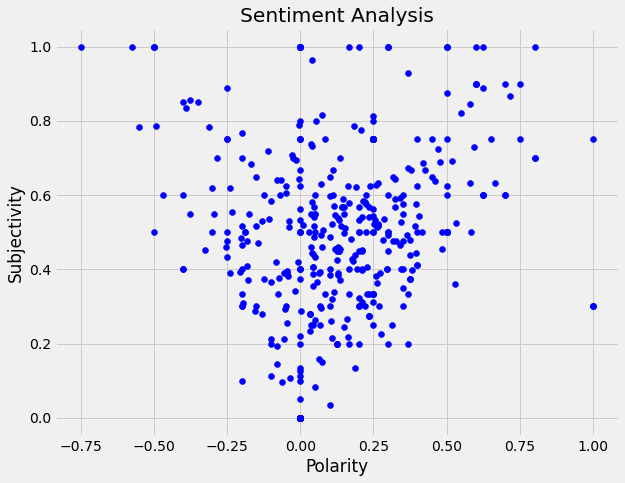

In [18]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i],savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [19]:
#create a function for wordcloud
def create_wordcloud(text):    
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(20,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

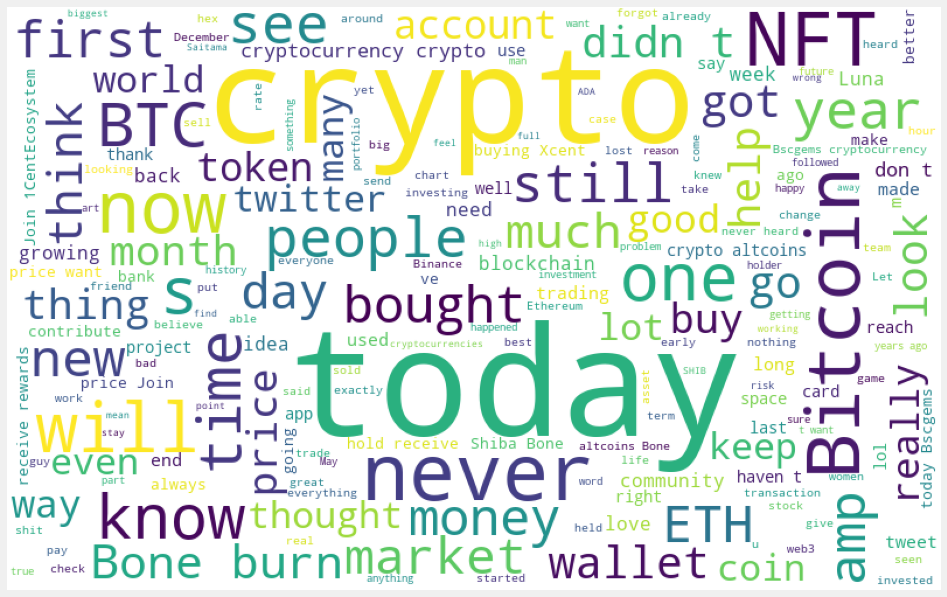

In [20]:
#plot wordcloud for all tweets
allTweets = savedTweets['cleanedTweets']
create_wordcloud(allTweets)

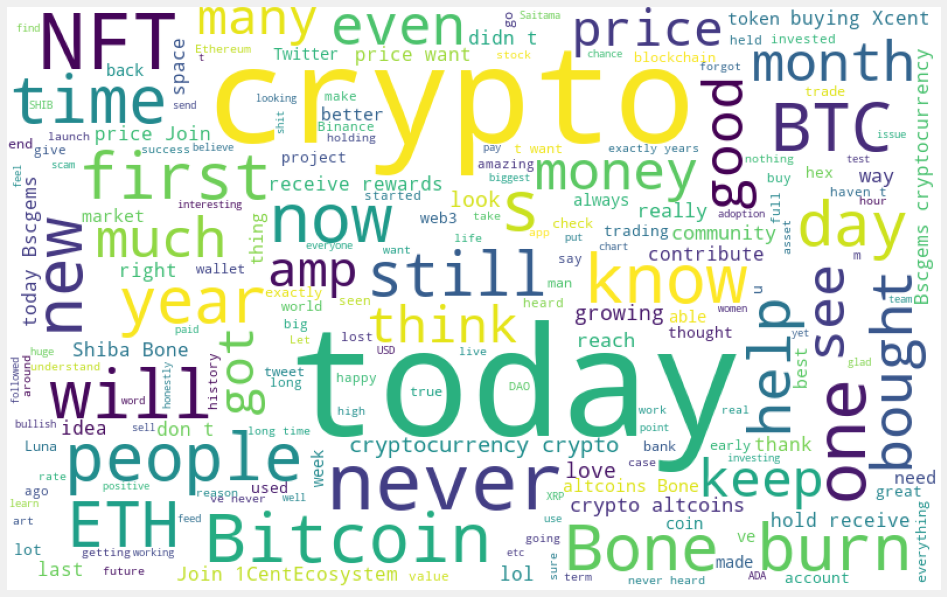

In [21]:
#create wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)

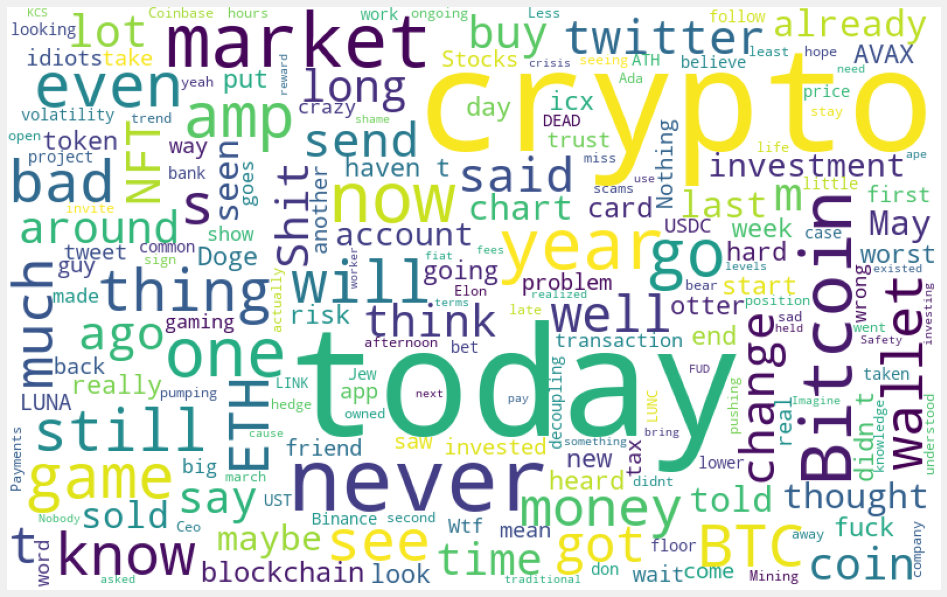

In [22]:
#plot wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)